In [1]:
%matplotlib inline
import json
import os
import folium
import pandas as pd
import matplotlib.pyplot as plt

print(folium.__version__)

0.3.0


In [2]:
lang='es'
opinions = pd.read_csv('../dataset/wiki/opinions_predicted.csv')
opinions = opinions[opinions.lang == lang]
print(opinions.shape)
opinions.cc3.unique()

(7925, 33)


array(['DOM', 'BLZ', 'USA', 'MEX', 'BOL', 'PRY', 'GTM', 'COL', 'HND',
       'CRI', 'ARG', 'CHL', 'VEN', 'PER', 'ECU', 'CUB', 'URY'], dtype=object)

In [3]:
opinions_country = opinions.groupby('cc3').size().reset_index(name='total')
opinions_cstance = opinions.groupby(['cc3','stance_pred']).size().reset_index(name='count')

opinions_cstance = pd.merge(opinions_cstance, opinions_country, on='cc3')
opinions_cstance['perc'] = opinions_cstance['count'].values / opinions_cstance['total'].values * opinions_cstance['stance_pred'].values# opinions_cstance.apply(lambda r: r['count']/r['total'] )
#opinions_cstance.head(10)


op_stats = opinions_cstance.groupby('cc3').agg({'perc': 'sum'})
op_stats = op_stats.reset_index()
op_stats
op_dict = op_stats.set_index('cc3')['perc']
#op_dict['BLZ']

In [4]:
#corrmat = opinions[['cc3','stance_pred', 'sentiment_pred']].groupby('cc3').corr()
#ds
corrmat = opinions[['cc3','stance_pred', 'sentiment_pred']].corr()
corrmat
#corrmat = ds.corr()
#corrmat
#ds = ds.reset_index()
#ds = ds.pivot_table(columns='cc3', values=['stance_pred', 'sentiment_pred'])
#ds.corr()

,stance_pred,sentiment_pred
stance_pred,1.000000,0.045386
sentiment_pred,0.045386,1.000000


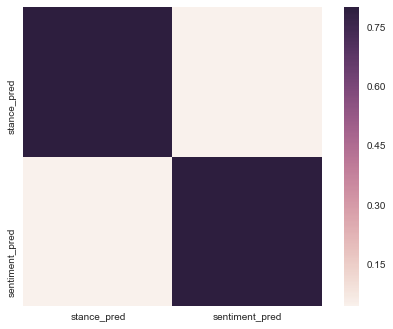

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(context="paper", font="monospace")

# Load the datset of correlations between cortical brain networks
#df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)
#corrmat = df.corr()

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=.8, square=True)
plt.savefig('../results/corr.eps', format='eps')